In [3]:
import argparse
import sys
import os
import numpy as np
from utils import *
from yolo.yolo import YOLO
from copy import deepcopy

Using TensorFlow backend.


In [ ]:
# ranajkhani.elc91@gmail.com

In [23]:
def detect_images(input_directory, output_directory='output', size = None):
    """
    detect all faces in all images of a directory and save thier cropped faces in output
    
    @param directory: input directory that includes all images
    @param output_directory: output directory
    @param size: (width, height) of desired output image
        
    """
    
    if not os.path.exists(output_directory):
        os.mkdir(output_directory)
    
    for path, directory, files in os.walk(input_directory):
        
        for img in files:
            try:
                cap = cv2.VideoCapture(os.path.join(path, img))

                net = cv2.dnn.readNetFromDarknet('./cfg/yolov3-face.cfg', './model-weights/yolov3-wider_16000.weights')
                net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
                net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)


                has_frame, frame = cap.read()

                # Create a 4D blob from a frame.
                blob = cv2.dnn.blobFromImage(frame, 1 / 255, (IMG_WIDTH, IMG_HEIGHT), [0, 0, 0], 1, crop=False)

                # Sets the input to the network
                net.setInput(blob)

                # Runs the forward pass to get output of the output layers
                outs = net.forward(get_outputs_names(net))

                original_frame = deepcopy(frame)

                # Remove the bounding boxes with low confidence
                faces = post_process(frame, outs, CONF_THRESHOLD, NMS_THRESHOLD)

                output_path = os.path.join(output_directory, ''.join(path.split('\\')[1:]))
                
                if not os.path.exists(output_path):
                    os.mkdir(output_path)


                for index, face in enumerate(faces):
                    left = face[0]
                    top = face[1]
                    w = face[2]
                    h = face[3]

                    cv2.imwrite(os.path.join(output_path, str(index) + '_' + img ), original_frame[top:top+h, left:left+w])

            except Exception as e:
                print(e)

In [26]:
detect_images('samples')

FACE = left, top, width, height

In [169]:
# faces = np.array(faces)
# faces

array([[116,  51,  84, 125],
       [128, 132,  30,  31]])

In [170]:
# face = faces[0]

# left = face[0]
# top = face[1]
# w = face[2]
# h = face[3]

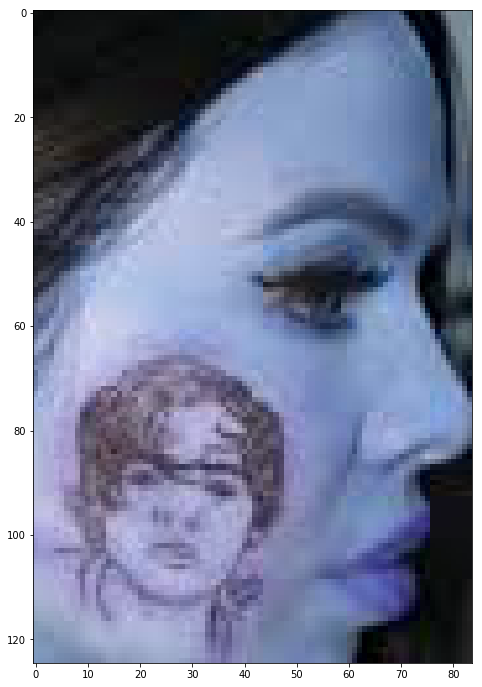

In [172]:
# fig, axs = plt.subplots(1,1,figsize=(15,12))
# axs.imshow(original_frame[top:top+h, left:left+w])

In [80]:
# blob.shape

(1, 3, 416, 416)

In [119]:
# frame.shape

(682, 1024, 3)

In [194]:
# cv2.rectangle(frame, (left, top), (right, bottom), COLOR_YELLOW, 2)


NameError: name 'right' is not defined

In [7]:
for path, directory, files in os.walk('samples'):
    
    for file in files:
        print(file)

samples
meeting_11_304.jpg
outside_000001.jpg
samples\image
imdawdaages.jpg


In [20]:
'samples\image'.split('\\')[1:]

['image']